In [1]:
import pandas as pd
import experiment_util as util
import models
import numpy as np
from ucimlrepo import fetch_ucirepo
import random
import matplotlib.pyplot as plt
import plot_util as putil

np.random.seed(0)
random.seed(0)

In [2]:
diabetes = fetch_ucirepo(id=296) 

raw_df=pd.DataFrame(diabetes.data.original)

df=raw_df.copy()
df

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df["readmitted"]=df["readmitted"].replace(['<30','>30'],['Yes','Yes'])
#unifiying <30 and >30 label to simplify the dataset task (as well as make different datasets comparable)
df=df.replace(['?'],[np.nan])
#Unifiying missing values
df=df.drop(df.loc[df["gender"]=="Unknown/Invalid",].index, axis=0)
#Remove rows where gender value are invalide
pre_df=util.preporcess_transform(df)

In [4]:
folds_index=np.array_split(df.sample(frac=1).index,5)
eval=util.evaluation(df,"gender","readmitted","Male",folds_index)
result=pd.DataFrame([],columns=util.column)
result.columns.name="Diabetes"
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity


In [5]:
result=util.append_Series(result,eval.cross_validation("Random Forest",models.RandomForest,pre_df))
result

/home/kdai332/Documents/Ethical-Framework/Aequitas/experiment_util.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df=pd.concat([dataframe,pd.DataFrame([series.to_list()],index=[series.name],columns=column)])


Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.02714,0.970885,1.244173,1.069579


In [6]:
result=util.append_Series(result,eval.cross_validation("Gradient Boost",models.GradientBoost,pre_df))
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.027140,0.970885,1.244173,1.069579
Gradient Boost,0.662500,1.031944,0.966552,1.229241,1.057022


In [7]:
result=util.append_Series(result,eval.cross_validation("FairGBM",models.Fairgbm,pre_df))
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.027140,0.970885,1.244173,1.069579
Gradient Boost,0.662500,1.031944,0.966552,1.229241,1.057022
FairGBM,0.628018,1.041063,0.959315,1.214090,1.043872


In [8]:
result=util.append_Series(result,eval.cross_validation("FairLearn",models.Fairlearn,pre_df))
result

[INFO] 2024-02-14 16:37:14 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:37:14 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:37:14 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-14 16:38:38 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:38:38 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:38:38 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-14 16:39:50 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:39:50 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:39:50 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-14 16:41:15 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:41:15 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:41:15 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-14 16:42:27 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:42:27 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:42:27 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.027140,0.970885,1.244173,1.069579
Gradient Boost,0.662500,1.031944,0.966552,1.229241,1.057022
FairGBM,0.628018,1.041063,0.959315,1.214090,1.043872
FairLearn,0.624883,1.032743,0.960553,1.250047,1.075866


/home/kdai332/Documents/Ethical-Framework/Aequitas/plot_util.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i]-x_range*0.15,y[i]+y_range*0.02,annotations[i])


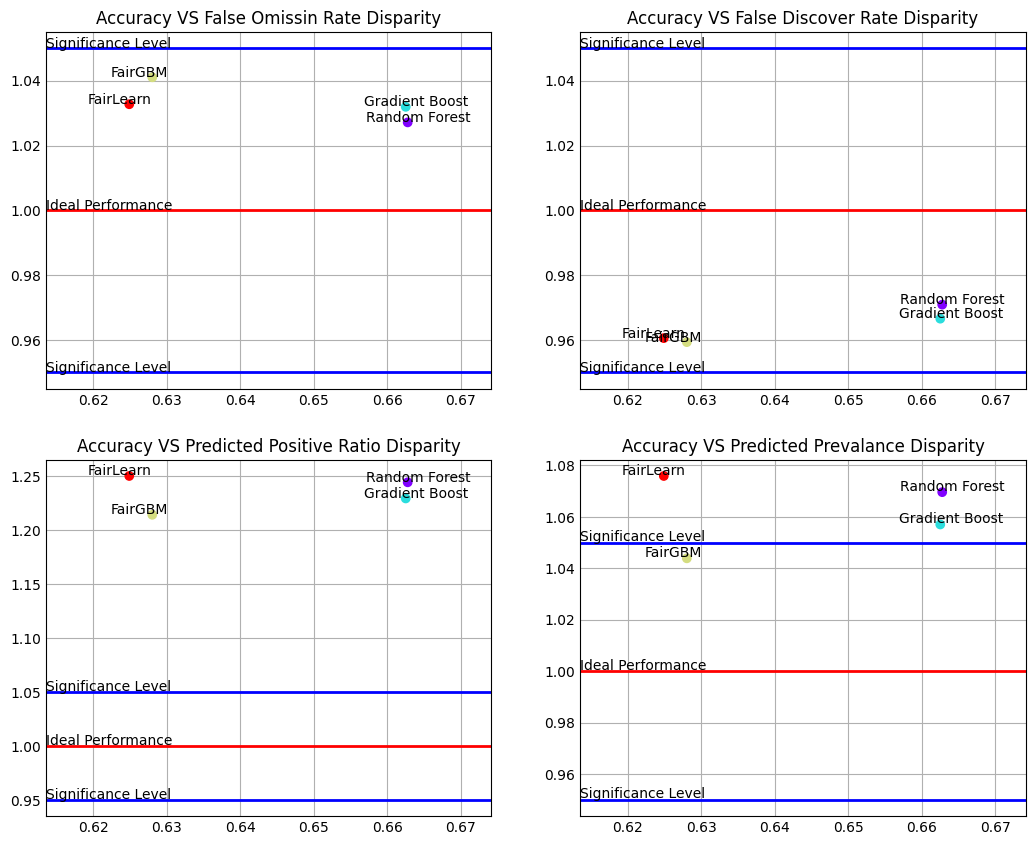

In [9]:
plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(2,2,figsize=(10,8))

putil.plot_scatter(ax[0][0],result["Accuracy"],result["False Omissin Rate Disparity"],"Accuracy VS False Omissin Rate Disparity",result.index)
putil.plot_scatter(ax[0][1],result["Accuracy"],result["False Discover Rate Disparity"],"Accuracy VS False Discover Rate Disparity",result.index)
putil.plot_scatter(ax[1][0],result["Accuracy"],result["Predicted Positive Ratio Disparity"],"Accuracy VS Predicted Positive Ratio Disparity",result.index)
putil.plot_scatter(ax[1][1],result["Accuracy"],result["Predicted Prevalance Disparity"],"Accuracy VS Predicted Prevalance Disparity",result.index)

plt.show()